# Project 1 - Part 2
### hyesoo choi (heh-soo choi)

<p> 
Skin tracking algorithm.
Using NumPy, OpenCv, and Matplotlib complete the following image pipeline.  Submit python notebook. </p>

<b>Image Pipeline </b><br />

-    Take a picture of your face or have a friend do it. 
-    Import the image into Jupyter Notebook. 
-    Analyze the image.  
-    Create a histogram of the whole image.
-    Modify your image with brightness and contrast so it fills the complete tonal range.
-    Create a mask of your face. 
-    Use the mask to create a HSV histogram. 
-    Analyze the histogram for skin tone ranges.
-    Use the HSV ranges to create a mask of skin tones. 
-    Apply the mask to the image and segment out your skin/face.

<p>For the last two steps in the pipeline, you will need to use cv2.bitwise_and and cv2.inRange. Read the documentation to understand the inputs that both functions accept and what they accomplish.</p>


In [6]:
# define adjust_brightness and contrast function (from class)
# output = alpha * input + beta

def adjust_brightness_contrast(image_array, alpha, beta):
    # Convert to floating point to avoid overflow and underflow
    temp = image_array.astype('float32')
    
    # Adjust contrast
    temp *= alpha
    
    # Adjust brightness
    temp += beta
    
    # Clip values to be in the range [0, 255]
    temp = np.clip(temp, 0, 255)
    
    return temp.astype('uint8')

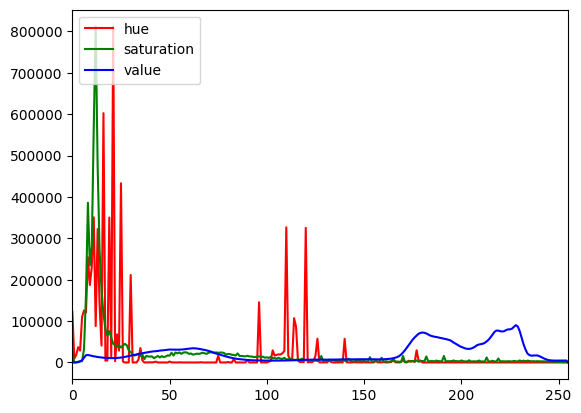

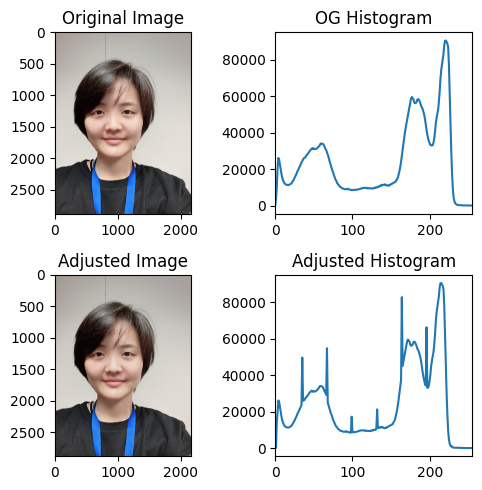

In [7]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 2. Import the image into Jupyter Notebook.
img_color = cv2.imread("../Graphics/my_face.JPG")

# 3. Analyze the image

# convert img to rgb
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# convert img to hsv
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
# convert to black and white to analyze the image brightness and contrast
img_bw = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# 4. Create a histogram of the whole image. RGB
# Hue
hist = cv2.calcHist([img_hsv], [0], None, [256], [0,255])
plt.plot(hist, color='red')
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_hsv], [1], None, [256], [0,255])
plt.plot(hist, color='green')
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_hsv], [2], None, [256], [0,255])
plt.plot(hist, color='blue')
plt.xlim([0,255])

plt.legend(["hue", "saturation", "value"], loc = 'upper left')
plt.show()

# calculate the histogram of bw img
hist_bw = cv2.calcHist([img_bw], [0], None, [256], [0,255])

# 5. Modify your image with brightness and contrast.
# Adjust brightness and contrast for better quality of image
contrast = 0.97
brightness = 1.05
adjusted_img_bw = adjust_brightness_contrast(img_bw, contrast, brightness)
adjusted_img_color = adjust_brightness_contrast(img_rgb, contrast, brightness) 

# Calculate histogram of adjusted image bw
adjusted_hist = cv2.calcHist([adjusted_img_bw],[0],None,[256],[0,255]) 

# Plotting original and adjusted images side-by-side
plt.figure(figsize=(5,5))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.plot(hist_bw)
plt.xlim([0,255])
plt.title('OG Histogram')

plt.subplot(2, 2, 3)
plt.imshow(adjusted_img_color, vmin=0, vmax=255)
plt.title('Adjusted Image')

plt.subplot(2, 2, 4)
plt.plot(adjusted_hist)
plt.xlim([0,255])
plt.title('Adjusted Histogram')

plt.tight_layout()
plt.show()



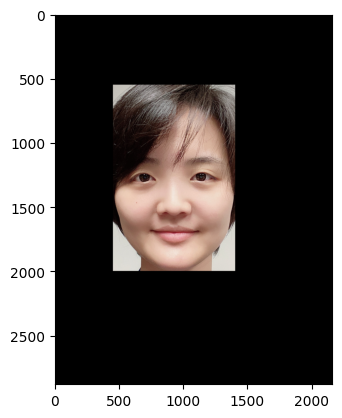

In [8]:
# 6. Mask out your face.
# create a mask (use bit-wise AND operator)
mask = np.zeros(img_rgb.shape[:2], np.uint8)
mask[550:2000, 450:1400] = 255

img_masked = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.imshow(img_masked)

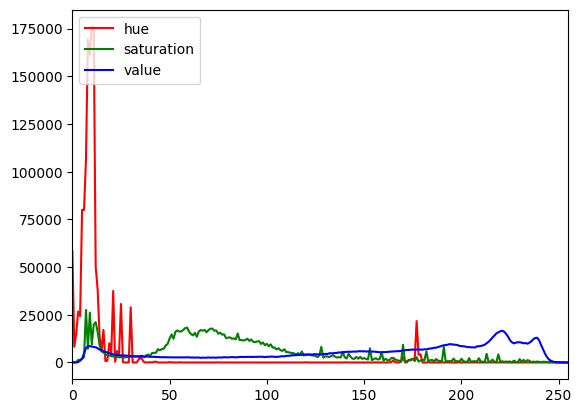

In [9]:

# 7. Use the mask to create a HSV histogram. 
# get the histogram of face area (masked)
hist = cv2.calcHist([img_hsv], [0], mask, [256], [0,255] )
plt.plot(hist, color='red')
plt.xlim([0,255])


hist = cv2.calcHist([img_hsv], [1], mask, [256], [0,255] )
plt.plot(hist, color='green')
plt.xlim([0,255])


hist = cv2.calcHist([img_hsv], [2], mask, [256], [0,255] )
plt.plot(hist, color='blue')
plt.xlim([0,255])

plt.legend(["hue", "saturation", "value"], loc = 'upper left')
plt.show()



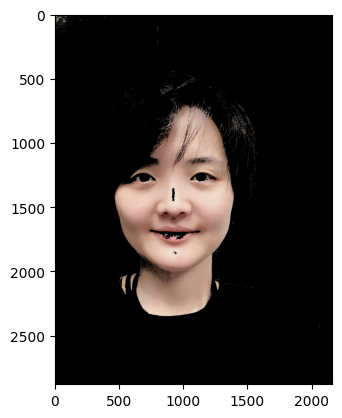

In [10]:
# 8. Using the above face histogram, Analyze the histogram for skin tone ranges.
# 9. Use the HSV ranges to create a mask.
mask = np.zeros(img_rgb.shape[:2], np.uint8)

# min_HSV = [h min, s min, v min] in histogram (estimate value)
# max_HSV = [h max, s max, v max] in histogram (estimate value)
min_HSV = np.array([0, 30, 120])
max_HSV = np.array([45,180,255])
mask = cv2.inRange(img_hsv, min_HSV, max_HSV)

# 10. Apply the mask to the image and segment out your skin/face
img_masked = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.imshow(img_masked)